In [4]:
# Description of the problem: Let X1, X2 X3 ... Xn be independent Unif(0,1) random variables. Find the conditional density of X1,
# given that it is not the smallest of the n values

# We will create a simulation of this process. We will try to find the ratio of how many times the X1 is indeed the smallest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Test
np.random.uniform(0,1, (10, 2))
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [2]:
# We need to a method to create some data with N, the size of each array, and K the number of times we will run this simulation

def create_unif_data(N, K):
    columns_ = []
    for i in range(0, K):
        columns_.append(str(i))
    
    return pd.DataFrame(np.random.uniform(0,1, (N, K)), columns = columns_)
    
        

In [74]:
# Test
test1 = create_unif_data(100, 10).idxmin(axis=1).apply(int)

In [75]:
#We need to figure out how many times does the minimum value appear in the 0th column
def quantity(data):
    num = 0
    for i in range(0, data.shape[0]):
        if data[i] == 0:
            num += 1
    return num
quantity(test1)

88

In [84]:
# We are ready to simulate the program 
# Let Alpha be the nubmer of uniform independent random variables

alpha = 20
data = []
for i in range(1,1000):
    experiment = create_unif_data(i, alpha).idxmin(axis=1).apply(int)
    data.append(quantity(experiment)/experiment.shape[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.42857142857142855,
 0.125,
 0.2222222222222222,
 0.2,
 0.0,
 0.08333333333333333,
 0.07692307692307693,
 0.14285714285714285,
 0.0,
 0.0625,
 0.11764705882352941,
 0.0,
 0.0,
 0.15,
 0.047619047619047616,
 0.09090909090909091,
 0.0,
 0.08333333333333333,
 0.12,
 0.07692307692307693,
 0.07407407407407407,
 0.10714285714285714,
 0.06896551724137931,
 0.06666666666666667,
 0.0967741935483871,
 0.0,
 0.030303030303030304,
 0.08823529411764706,
 0.11428571428571428,
 0.05555555555555555,
 0.08108108108108109,
 0.05263157894736842,
 0.05128205128205128,
 0.075,
 0.0975609756097561,
 0.07142857142857142,
 0.06976744186046512,
 0.022727272727272728,
 0.022222222222222223,
 0.08695652173913043,
 0.06382978723404255,
 0.020833333333333332,
 0.04081632653061224,
 0.02,
 0.0196078431372549,
 0.0,
 0.05660377358490566,
 0.018518518518518517,
 0.01818181818181818,
 0.05357142857142857,
 0.03508771929824561,
 0.034482758620689655,
 0.01694915254237288,
 0.033333

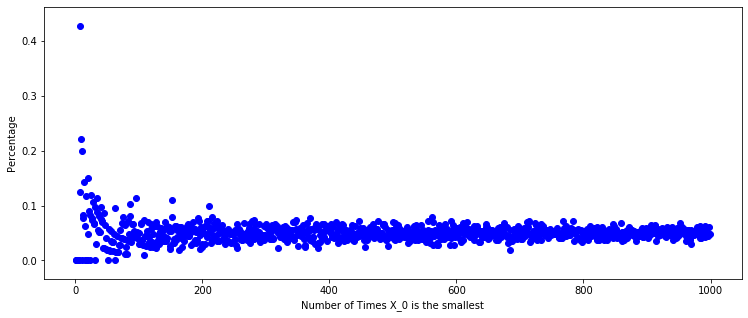

In [85]:
# We are going to create a plot
plt.figure(figsize = (12.5, 5))
plt.scatter(range(1, 1000), data, color = "blue")
plt.xlabel("Number of Times X_0 is the smallest")
plt.ylabel("Percentage")
plt.show()


In [5]:
# Now we will try to create a conditional probability
test2 = create_unif_data(11, 10)
print(len(test2))
print(len(test2.min(axis=1)))

# This function conditional data, a new column whose data is sample of values comes from uniform dist larger than min of sample to 1
def beta(data):
    s1 = data.min(axis=1)
    new_data = []
    for i in range(0, len(s1)):
        new_data.append(np.random.uniform(s1[i], 1))
    return pd.DataFrame(sorted(new_data), columns = ["Cond_Prob"])


# This function will generate data for the a specific function n+1/n * (1-(1-x)^n)  for x in (0,1) and n the number of rv's

def pdf_guess(x, n):
    a = (n+1)/n
    b = (1-x)**n
    return a*(1-b)



11
11


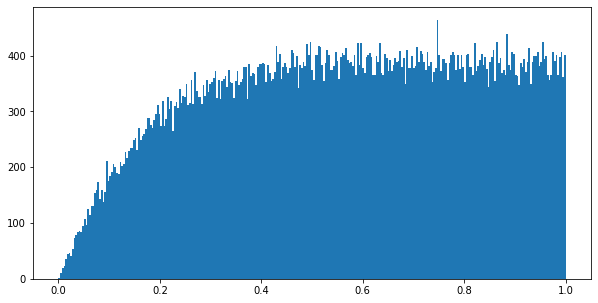

In [8]:
# Now we are going to plot the new conditional data
cond_data = beta(create_unif_data(100000, 7))
plt.figure(figsize = (10,5))
plt.hist(cond_data["Cond_Prob"], bins=np.linspace(0,1, 300), range = (0,1))
plt.show()

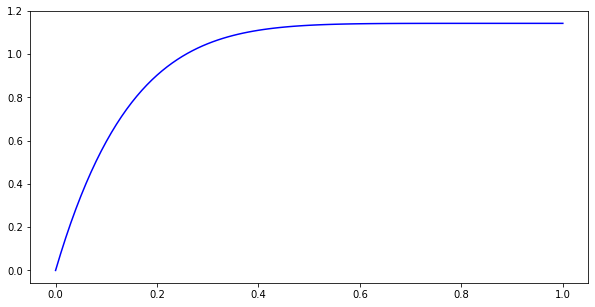

In [76]:
# M  size of the mini intervals
y_values = []
x_values = []
M = 100
j = 0
for i in range(0, M+1):
    j = i/M
    x_values.append(j)
    y_values.append(pdf_guess(j, 7))

# We are going to plot this data
plt.figure(figsize = (10,5))
plt.plot(x_values, y_values, color = "blue")
plt.show()

In [ ]:
# It works: the pdf is indeed (n+1)/n (1-(1-x)^n)